<img src="../src/packt-banner.png" alt="">

(1) import the requierd pakages: (1 point)

* pandas as pd
* numpy as np
* matplotlib.pyplot as plt
* seaborn as sns



In [30]:

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns



%config InlineBackend.figure_format='retina'
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize'] = (9, 6)
plt.rcParams['axes.labelpad'] = 10
sns.set_style("darkgrid")


In [31]:
## Read the data from csv file:
df =pd.read_csv('hr_data.csv')

In [32]:

df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'is_smoker', 'department', 'salary'],
      dtype='object')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,is_smoker,department,salary
0,0.38,0.53,2,157.0,3.0,0,yes,0,NaN,sales,low
1,0.80,0.86,5,262.0,6.0,0,yes,0,yes,sales,medium
2,0.11,0.88,7,272.0,4.0,0,yes,0,NaN,sales,medium
3,0.72,0.87,5,223.0,5.0,0,yes,0,NaN,sales,low
4,0.37,0.52,2,NaN,NaN,0,yes,0,no,sales,low


In [34]:

df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,is_smoker,department,salary
14994,0.40,0.57,2,151.0,3.0,0,yes,0,NaN,support,low
14995,0.37,0.48,2,160.0,3.0,0,yes,0,NaN,support,low
14996,0.37,0.53,2,143.0,3.0,0,yes,0,NaN,support,low
14997,0.11,0.96,6,280.0,4.0,0,yes,0,NaN,support,low
14998,0.37,0.52,2,158.0,3.0,0,yes,0,NaN,support,low


In [35]:

with open('hr_data.csv') as f:
    print(len(f.read().splitlines()))

15000


In [36]:

len(df)

14999

In [37]:

#target column is left
df['left']

0        yes
1        yes
2        yes
3        yes
4        yes
        ... 
14994    yes
14995    yes
14996    yes
14997    yes
14998    yes
Name: left, Length: 14999, dtype: object

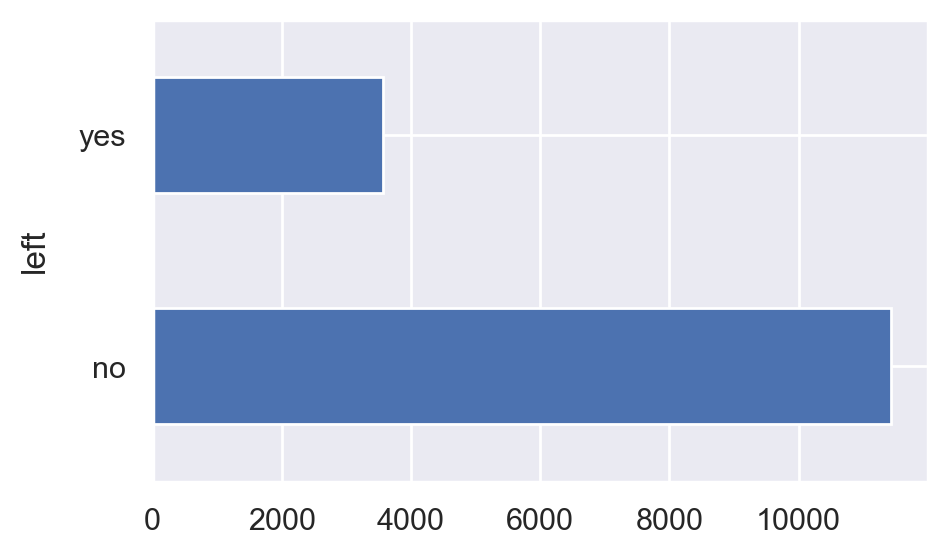

In [38]:

fig, ax = plt.subplots(figsize=(5, 3))


df.left.value_counts().plot(kind='barh',ax=ax)
plt.show()

In [39]:
# Missing data
df.left.isnull().sum()

0

In [40]:
# Print datatypes
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours     float64
time_spend_company       float64
work_accident              int64
left                      object
promotion_last_5years      int64
is_smoker                 object
department                object
salary                    object
dtype: object

2- Display the feature distributions.

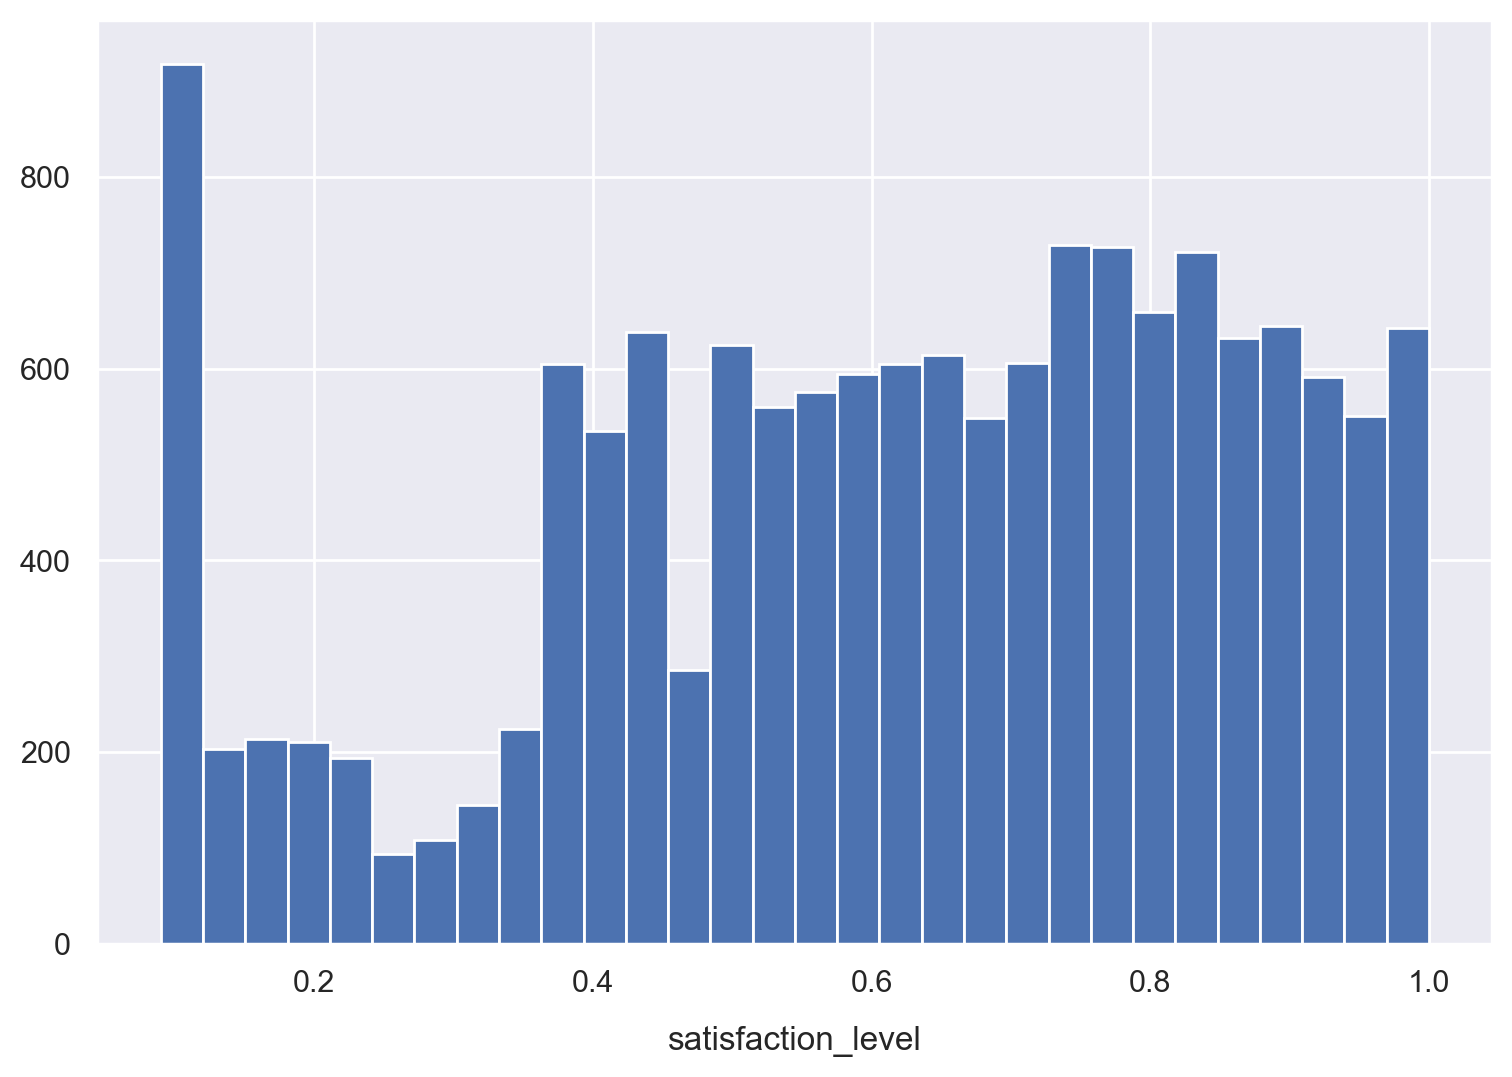

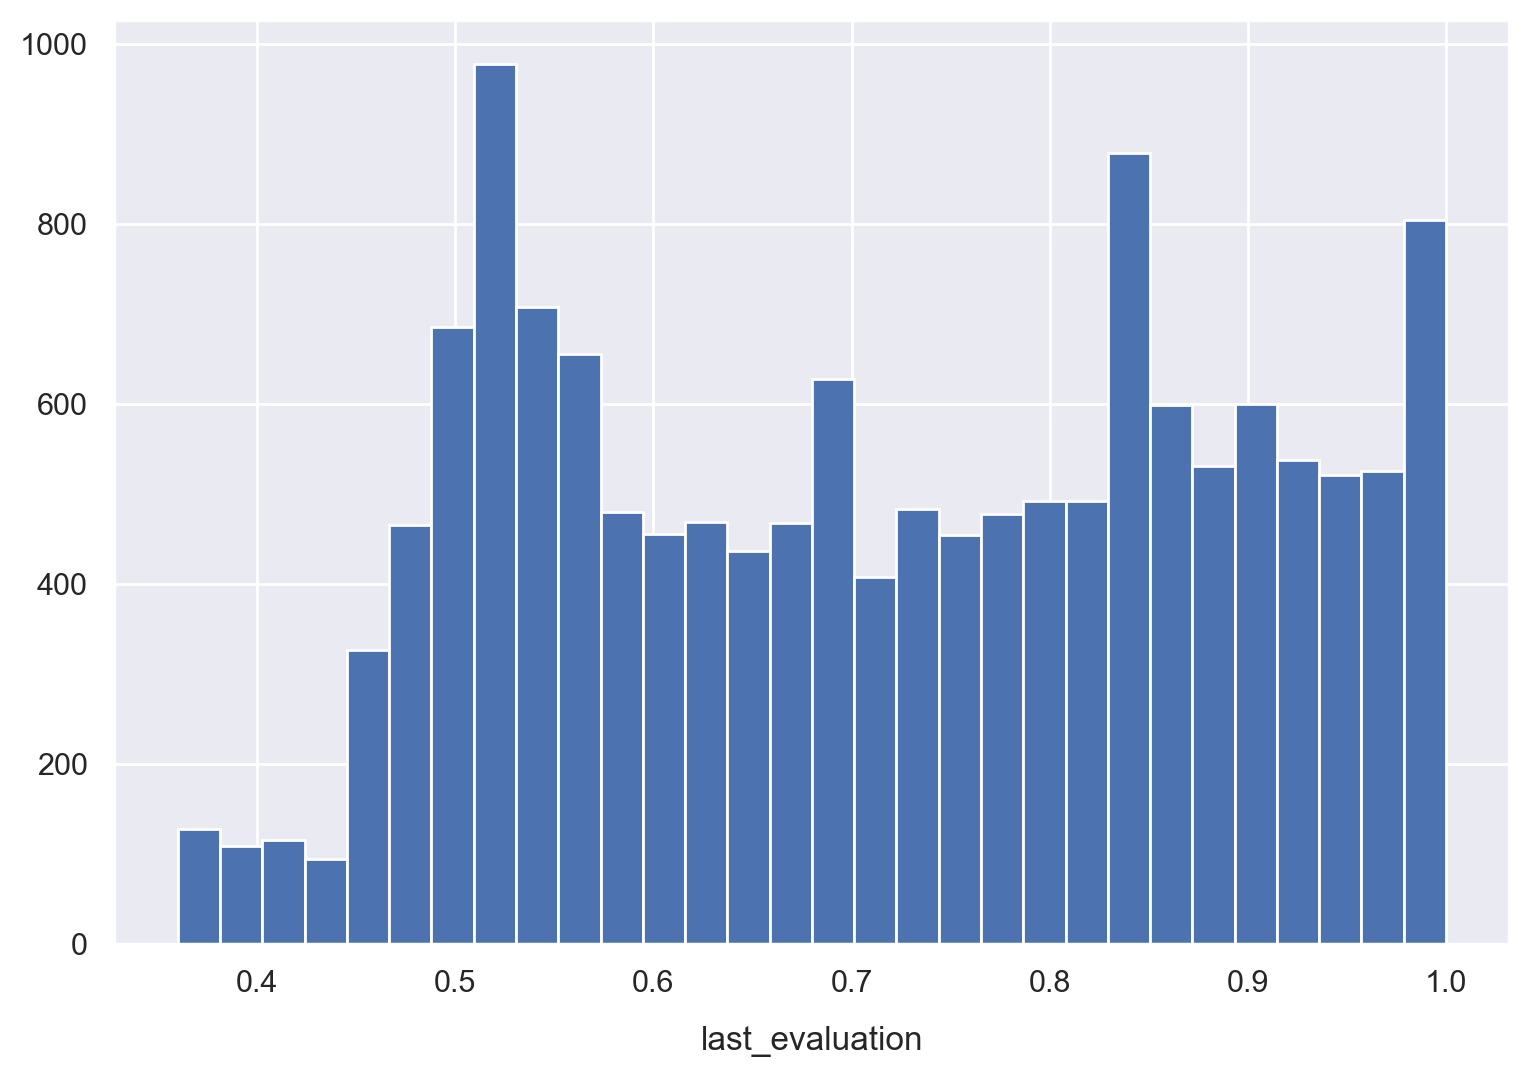

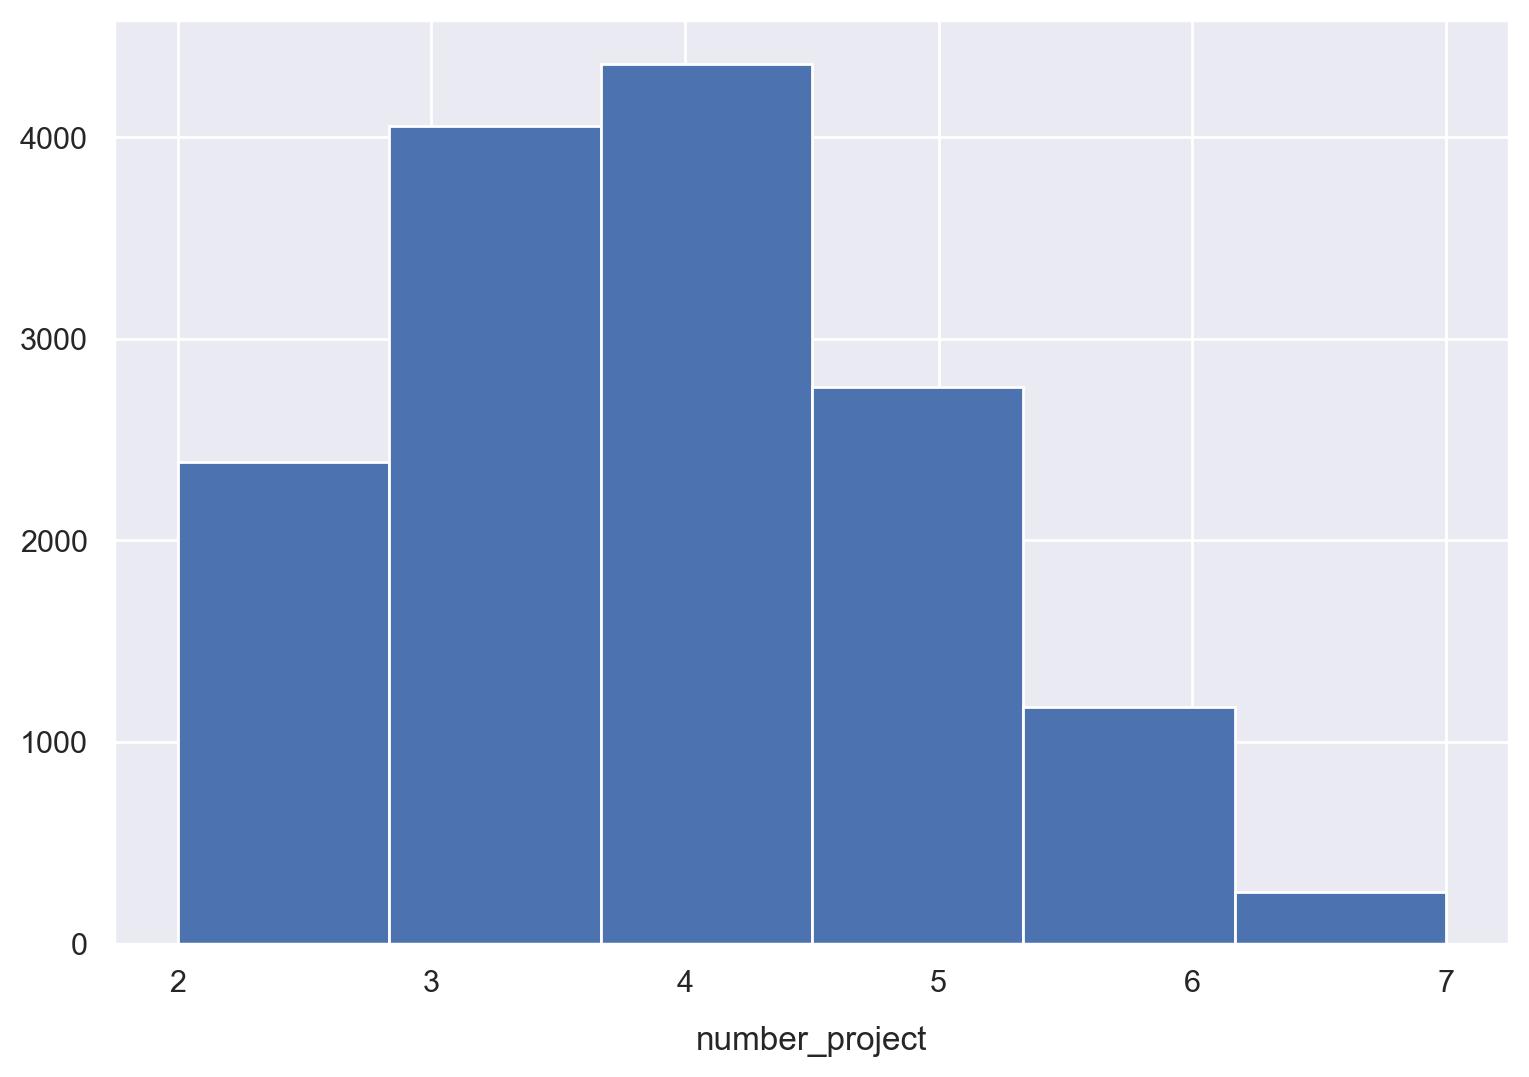

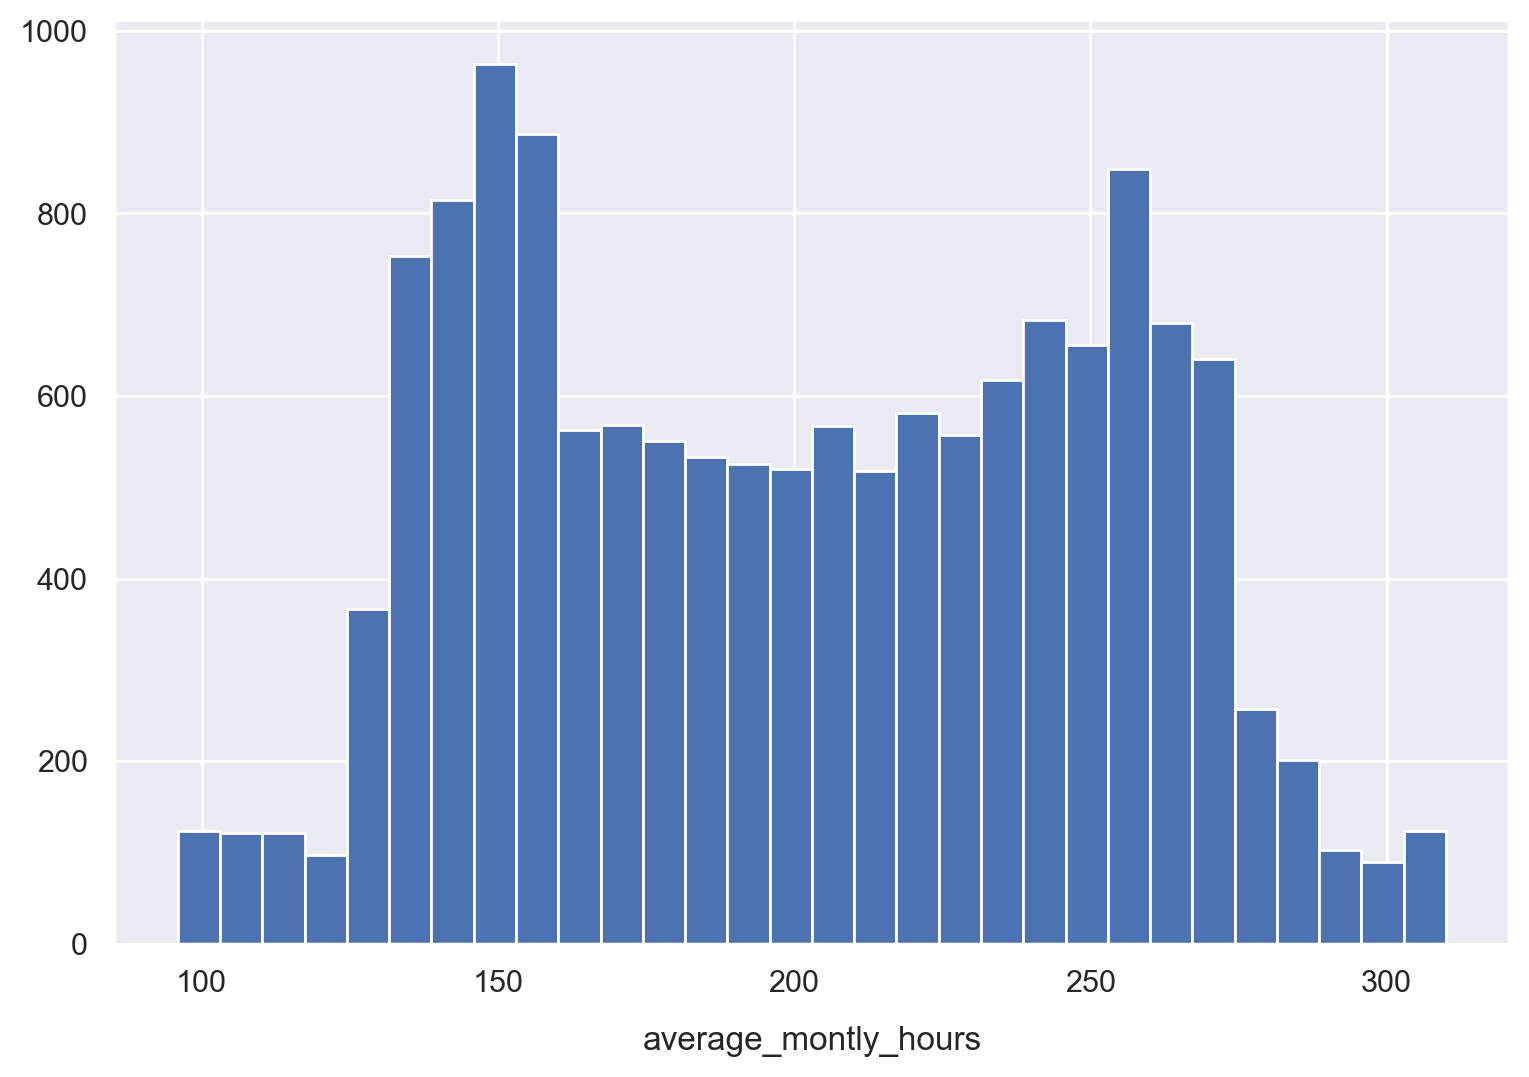

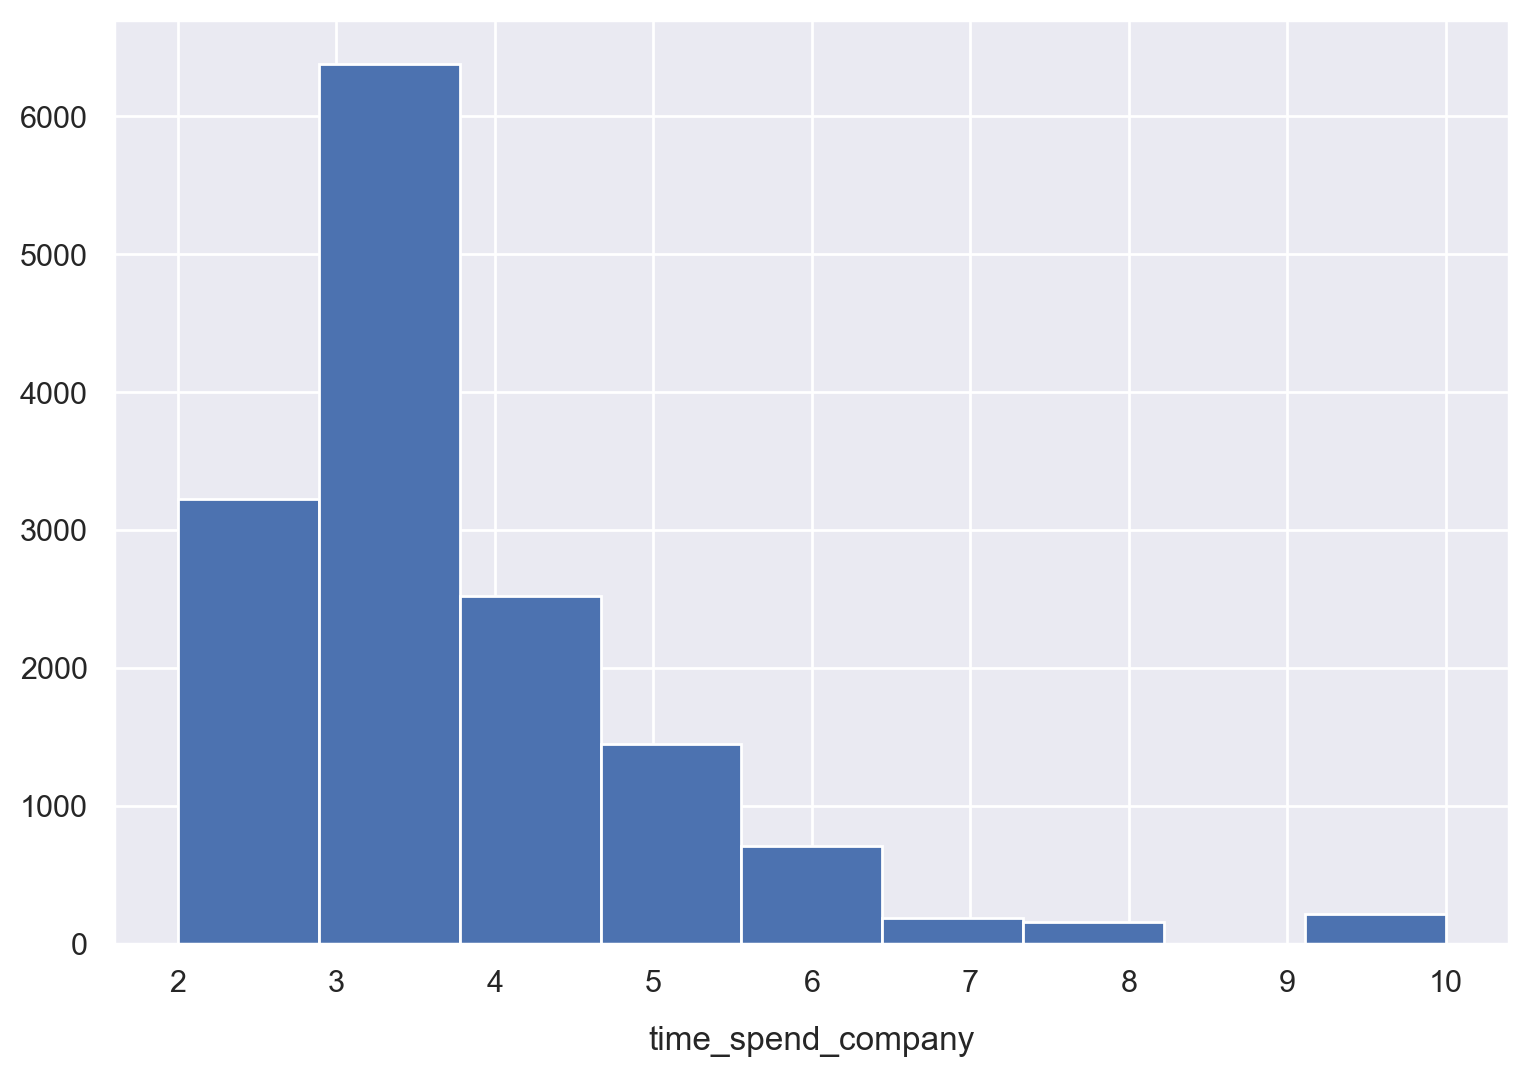

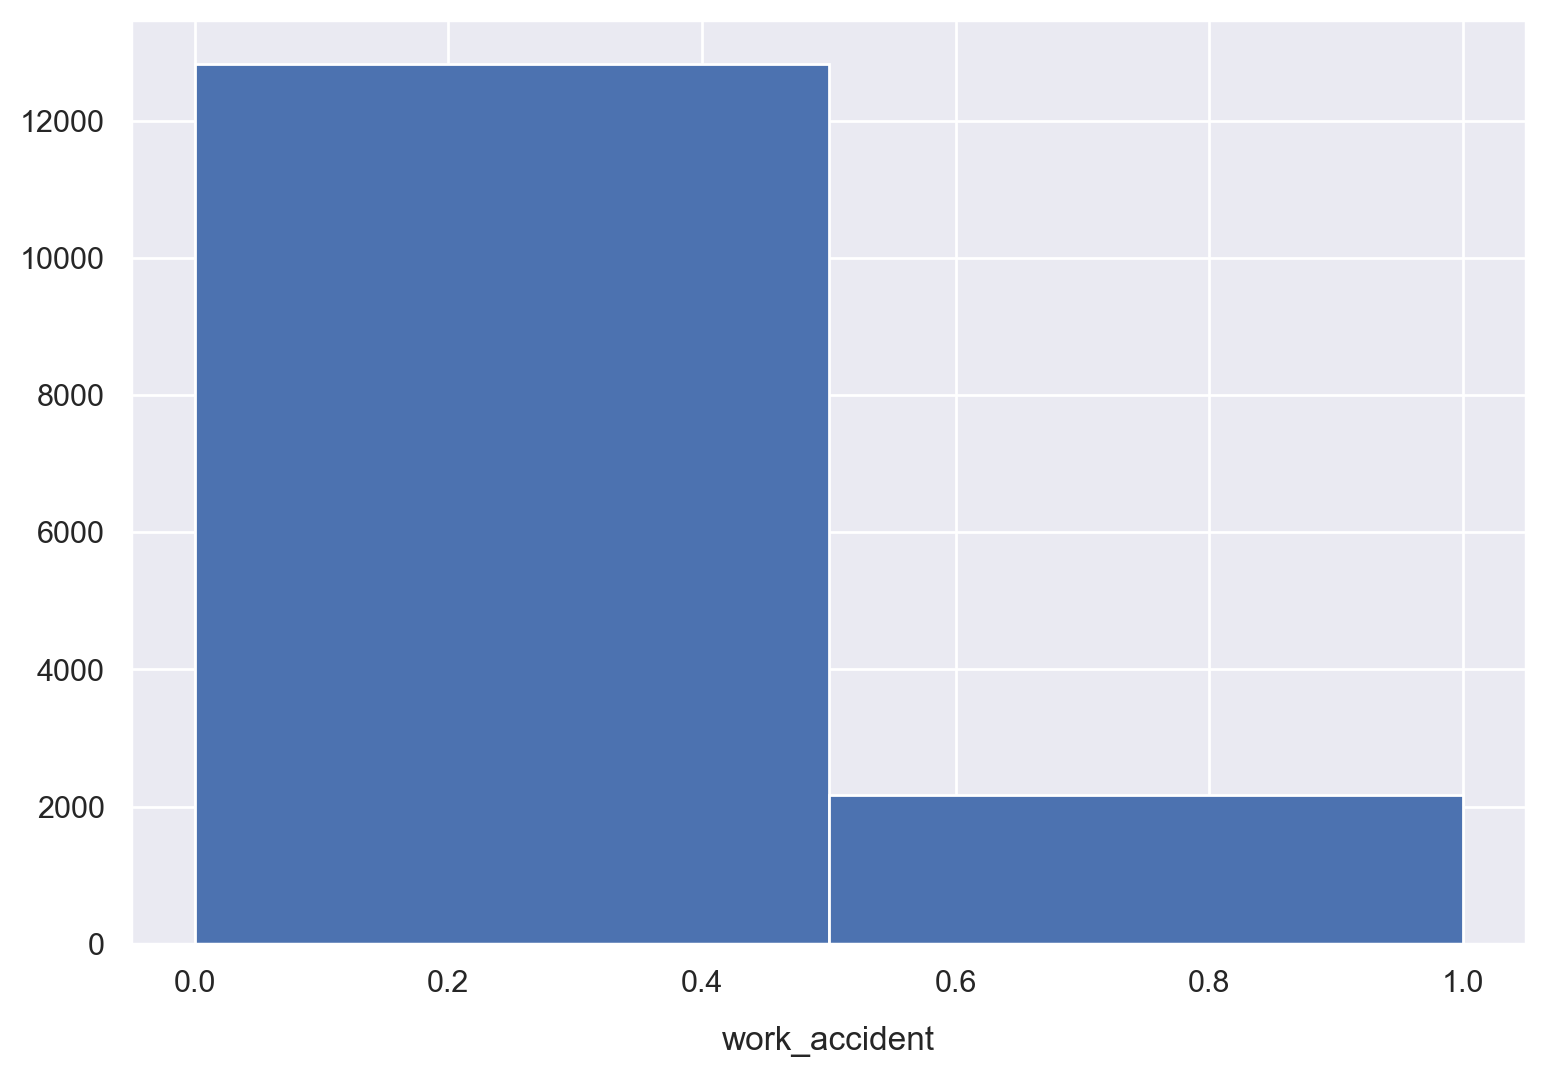

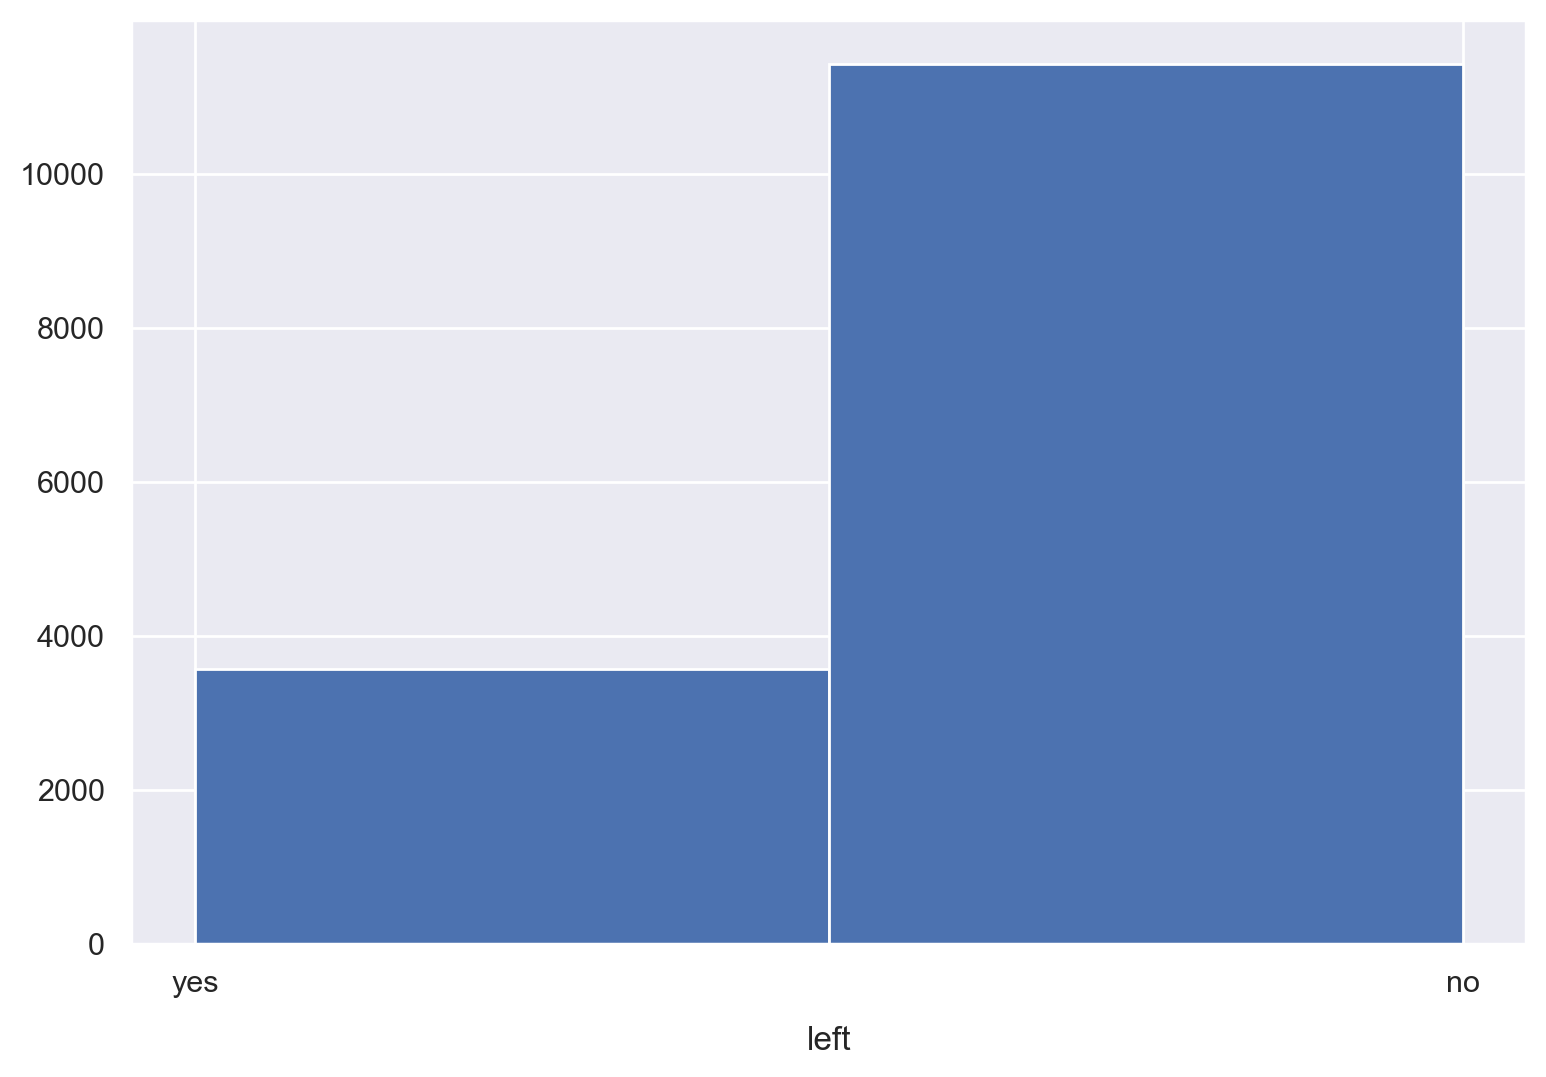

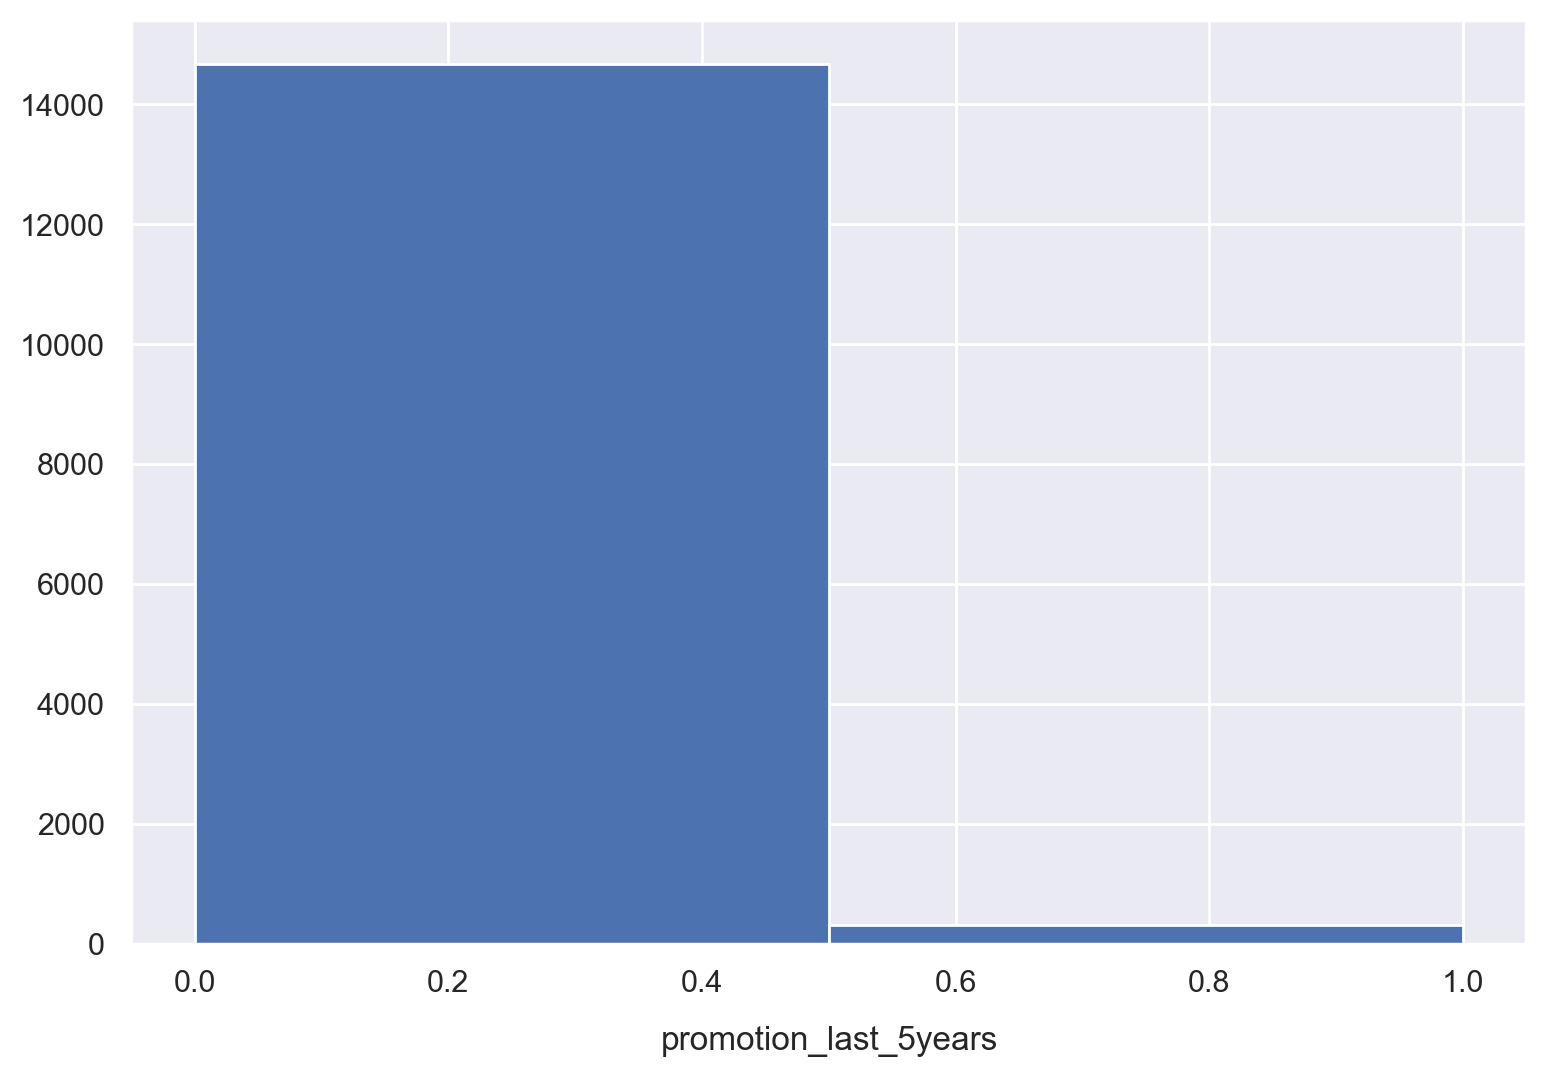

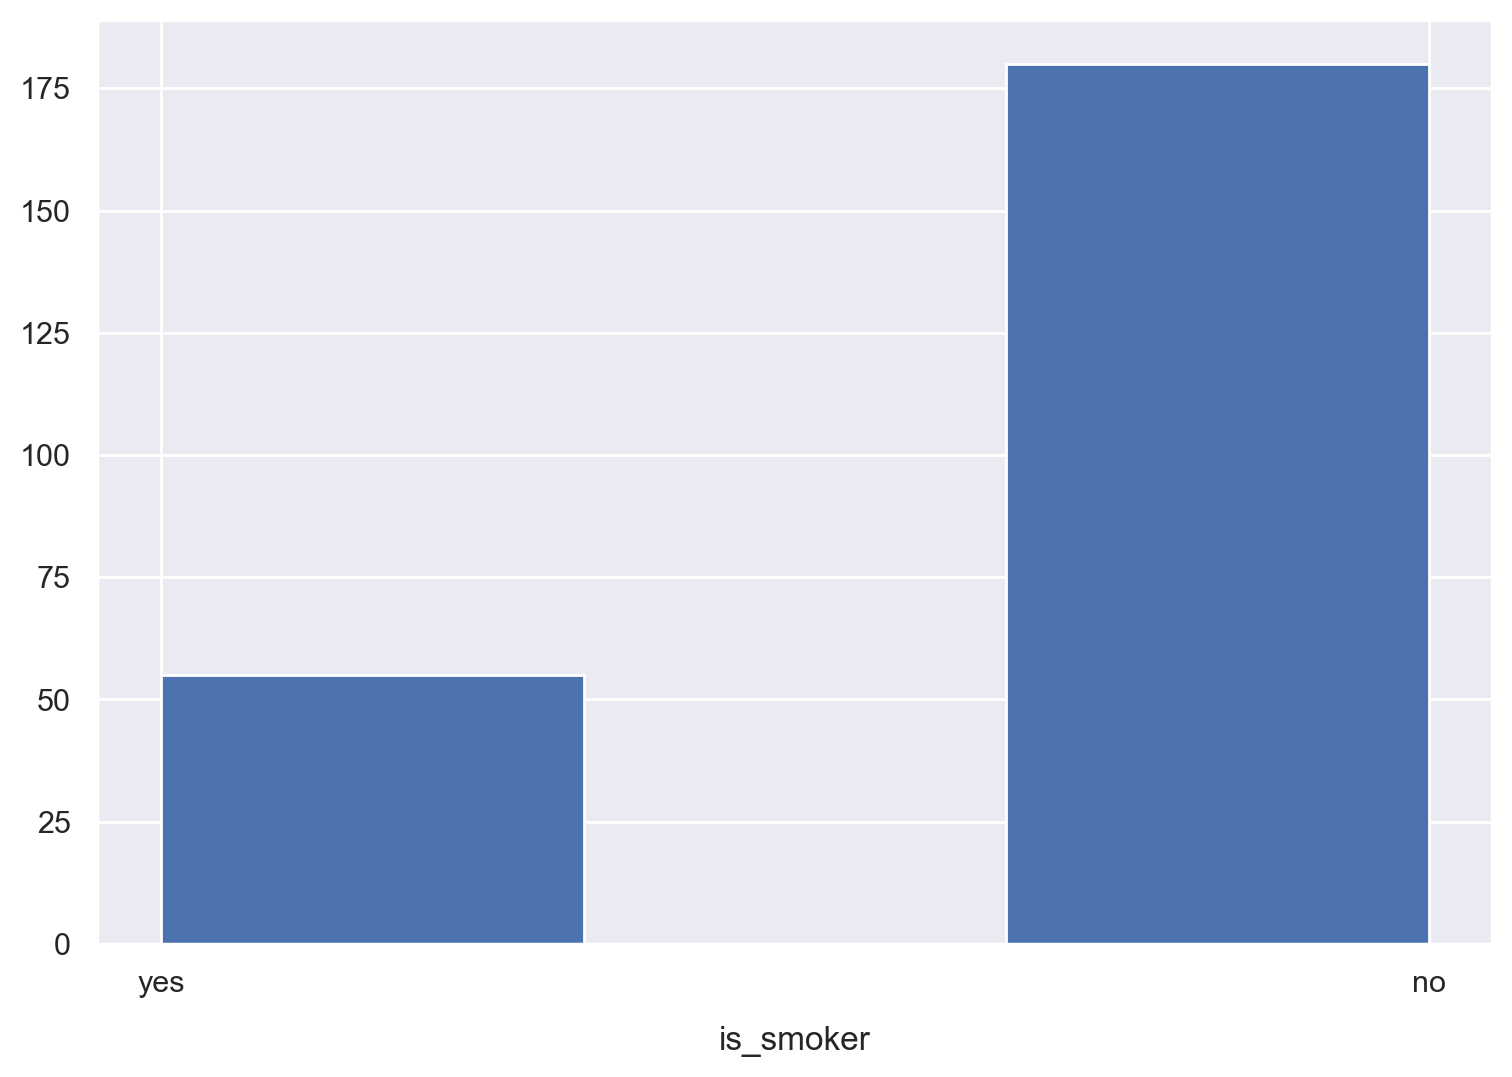

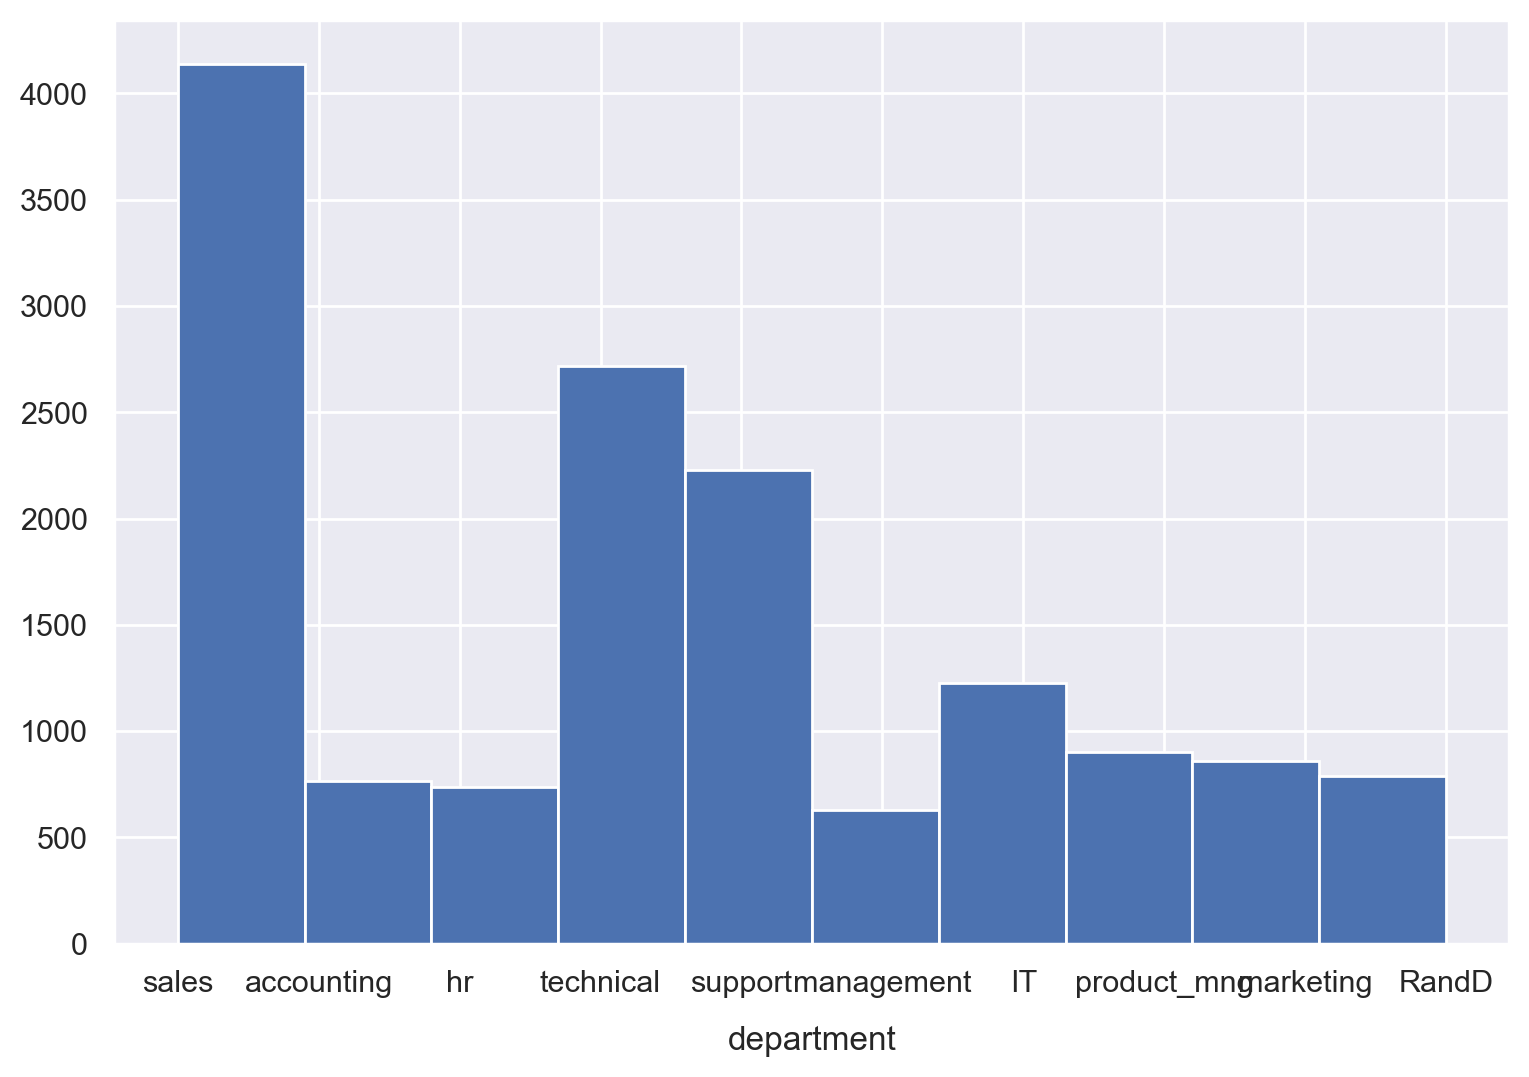

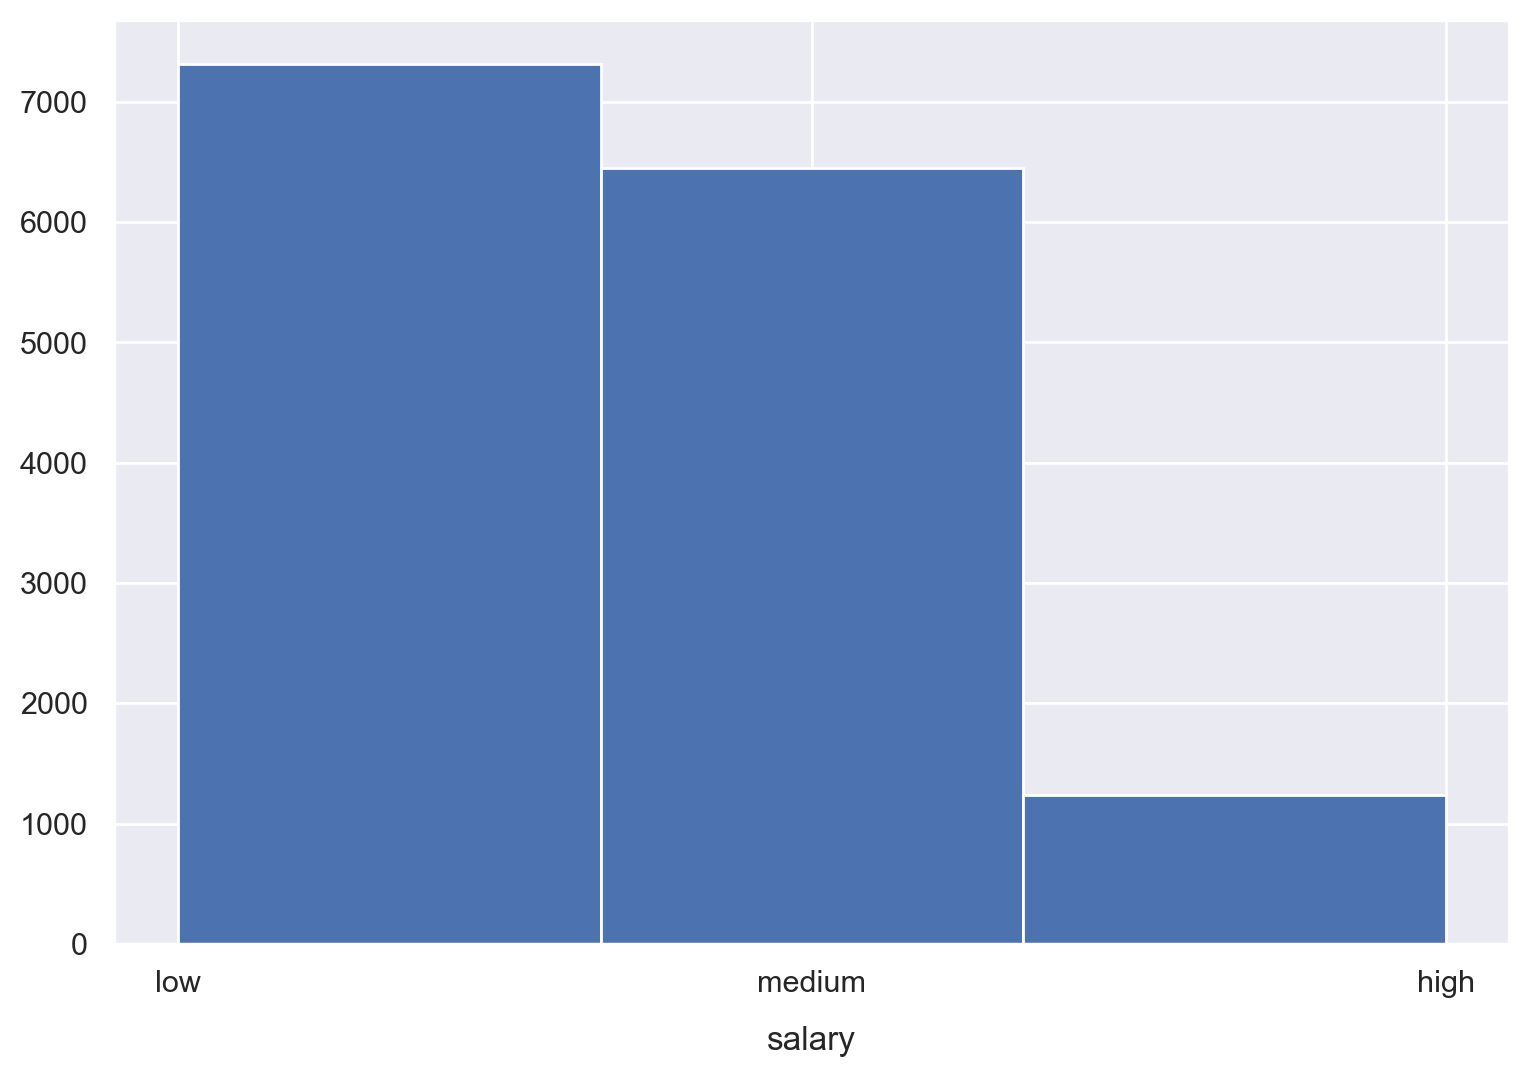

In [41]:
# Print the distibutions
for f in df.columns:
    try:
        fig = plt.figure()
        num_bins = min((30, len(df[f].unique())))
        df[f].hist(bins=num_bins)
        plt.xlabel(f)
    except TypeError:
        print()
        print(df[f].value_counts())
        print('-'*30)
        plt.close()

In [42]:


df.isnull().sum()

satisfaction_level           0
last_evaluation              0
number_project               0
average_montly_hours       368
time_spend_company         151
work_accident                0
left                         0
promotion_last_5years        0
is_smoker                14764
department                   0
salary                       0
dtype: int64

In [43]:

df.isnull().sum() / len(df) * 100

satisfaction_level        0.000000
last_evaluation           0.000000
number_project            0.000000
average_montly_hours      2.453497
time_spend_company        1.006734
work_accident             0.000000
left                      0.000000
promotion_last_5years     0.000000
is_smoker                98.433229
department                0.000000
salary                    0.000000
dtype: float64

We can see there are about 2.5% missing for average_montly_hours, 1% missing for time_spend_company, and 98% missing for is_smoker! Let's use a couple of different strategies that you've learned to handle these.

Dropping the is_smoker column as there is barely any information in this metric 

In [44]:
# Remove is_smoker
df.drop('is_smoker',axis=1,inplace=True)


 Filling the NaN values in the time_spend_company column with median 

In [45]:
# Fill time_spend_company

df['time_spend_company'].fillna(df['time_spend_company'].median(),inplace=True)

<Axes: xlabel='number_project', ylabel='average_montly_hours'>

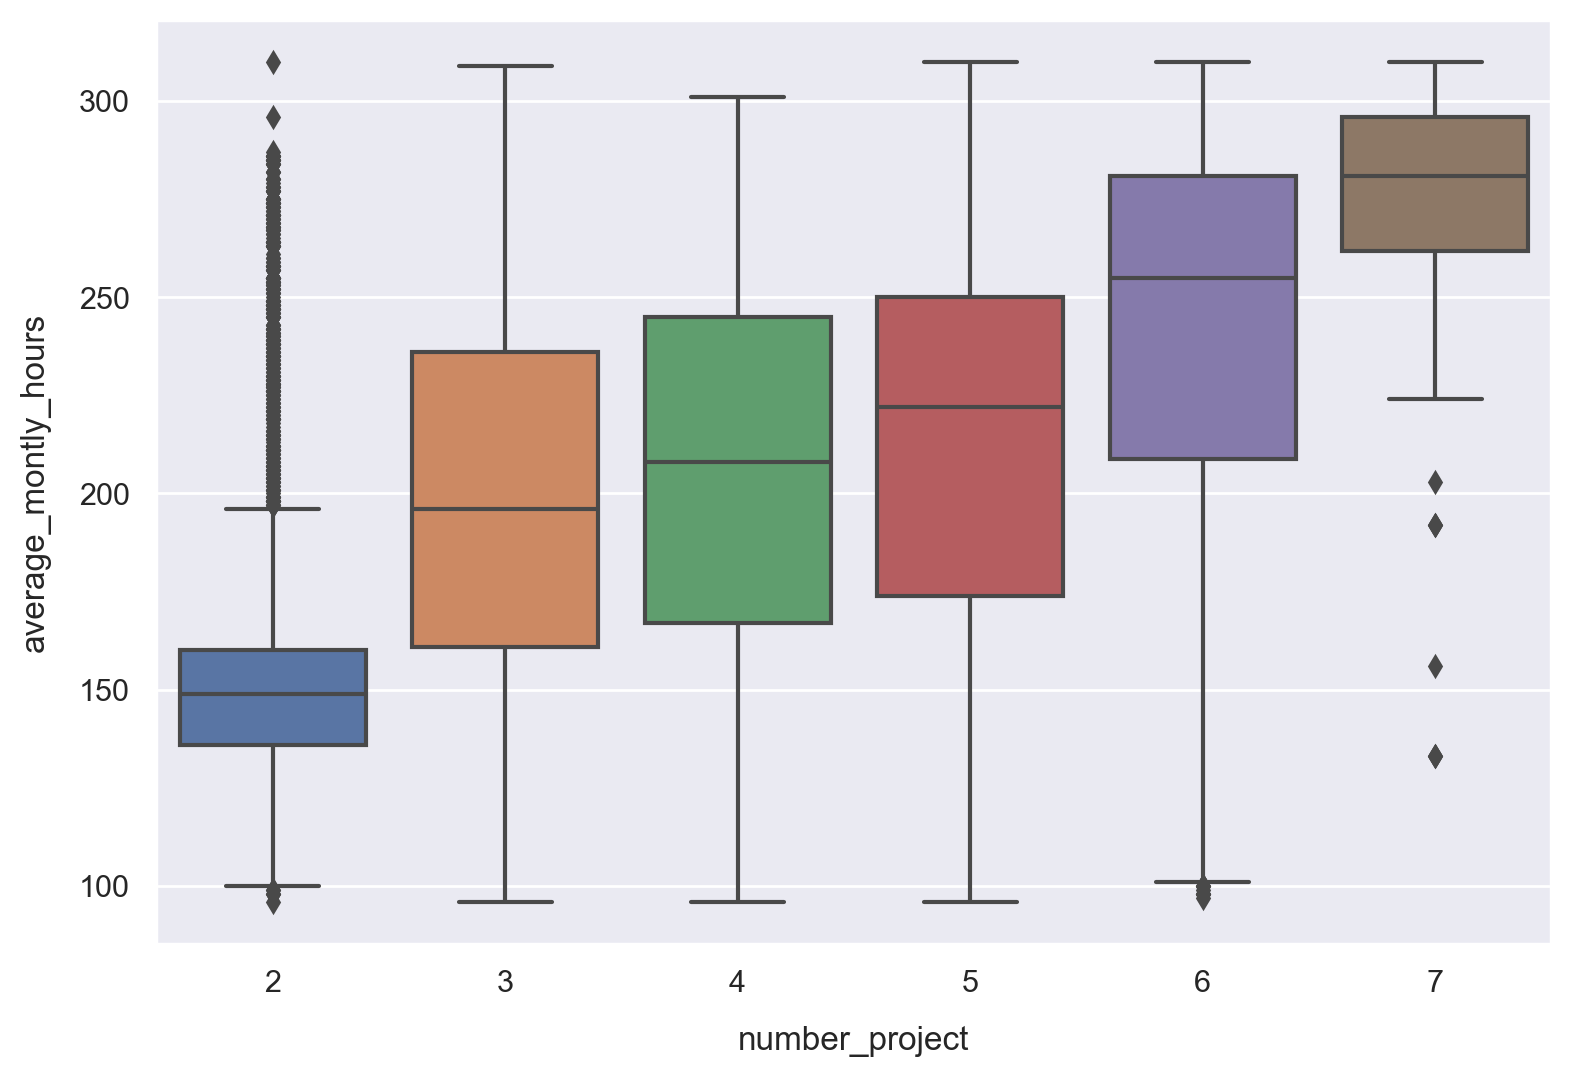

In [46]:
# How does average_montly_hours depend on number_project
sns.boxplot(x='number_project', y='average_montly_hours', data=df)


In [48]:
# Calculate fill values for average_montly_hours

mean_per_project = df.groupby('number_project')\
                    .average_montly_hours.mean()
mean_per_project = dict(mean_per_project)
mean_per_project

{2: 160.16353543979506,
 3: 197.47882323104236,
 4: 205.07858315740089,
 5: 211.99962839093274,
 6: 238.73947368421054,
 7: 276.015873015873}

We can then map this onto the number_project column and pass the resulting series object as the argument to fillna.

In [49]:
fill_values = df.number_project.map(mean_per_project)
# Fill average_monthly_hours with the fill_values
df['average_montly_hours'].fillna(fill_values,inplace=True)

In [50]:
# Make sure we are all clear of NaNs
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

11- Transform the string and Boolean fields into integer representations. 

In particular, we'll manually convert the target variable left from yes and no to 1 and 0 and build the one-hot encoded features.

In [51]:
# Convert categorical features to binary integer representation
df['left']=df['left'].map({'yes':1,'no':0})

In [52]:
dummy_df = pd.get_dummies(df)
dummy_df_numeric = dummy_df.astype(int)
df = pd.concat([df, dummy_df_numeric], axis=1)
df.drop(['department','salary'],axis=1,inplace=True)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157.000000,3.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262.000000,6.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272.000000,4.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223.000000,5.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,160.163535,3.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [53]:

df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'satisfaction_level', 'last_evaluation',
       'number_project', 'average_montly_hours', 'time_spend_company',
       'work_accident', 'left', 'promotion_last_5years', 'department_IT',
       'department_RandD', 'department_accounting', 'department_hr',
       'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_high', 'salary_low', 'salary_medium'],
      dtype='object')

In [54]:
# Save to file

df.to_csv('hr_data_processed.csv', index=False)